# #Proyecto 1 Admin. Bases de Datos

Importación de librerías

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2 as pg2
import numpy as np
import time as t
from matplotlib.ticker import FuncFormatter

Se inicializa la conexión con la DB

In [2]:
conn = pg2.connect(host='localhost', dbname="sambilproyecto", user="postgres", password="1234")
cur = conn.cursor()

Ahora unos resultados de vistas y gráficos:

Vista Obligatoria 1: Porcentaje de ventas hecho a personas con smartphone y sin smartphone 

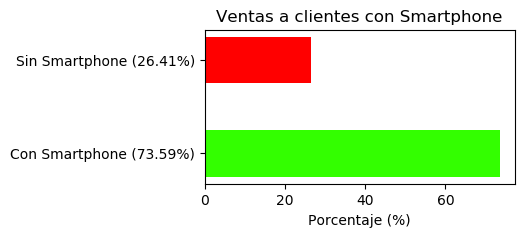

,Sin Smartphone,Con Smartphone
0,26.41,73.59


In [3]:
%matplotlib inline
cur.execute('SELECT * FROM porcentajeventassmartphone;')

data=cur.fetchone()
labels=('Sin Smartphone ('+str(data[0])+'%)','Con Smartphone ('+str(data[1])+'%)')

y_pos = np.arange(len(labels))

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,2))

ax.barh(y_pos, data, height=0.5, align='center', color=['#FF0000','#33FF00'])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Porcentaje (%)')
ax.set_title('Ventas a clientes con Smartphone')

df = pd.DataFrame([data], columns=('Sin Smartphone','Con Smartphone'))

plt.show()

df

Vista Obligatoria 2: Top 5 personas que más tiempo han pasado en el centro comercial en el último mes.

In [5]:
cur.execute("SELECT * FROM top5mastiempo;")
data = cur.fetchall()

labels=('id de Smartphone','Tiempo en el CC')
df = pd.DataFrame(data, columns=labels)

df

,id de Smartphone,Tiempo en el CC
0,95,2 days 09:23:00
1,45,2 days 08:39:00
2,60,1 days 23:49:00
3,21,1 days 23:26:00
4,237,1 days 20:46:00


Vista Extra 1: Top 5 franquicias cuyos han facturado una mayor cantidad de compras en el último mes.

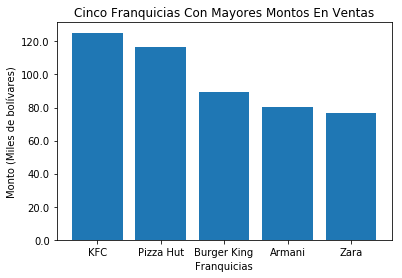

In [6]:
%matplotlib inline
cur.execute("SELECT * FROM top5franquiciasventas;")
data = cur.fetchall()

label = ('Franquicia','Ventas Totales')
x = np.arange(len(data))
montos = []
franquicias = []

for val in data:
    montos.append(val[1])
    franquicias.append(val[0])

def miles(x, pos):
    return '%1.1f' % ( x * 1e-3 )

formatter = FuncFormatter(miles)

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(formatter)
plt.bar(x, montos)
plt.xticks(x, franquicias)

ax.set_xlabel('Franquicias')
ax.set_ylabel('Monto (Miles de bolívares)')
ax.set_title('Cinco Franquicias Con Mayores Montos En Ventas')

plt.show()

Vista Extra 2: Mostrar por sector cual es el cliente que más tiempo ha pasado en uno de los locales de ese sector.

In [7]:
cur.execute("SELECT * FROM mastiempoporsector;")

data = cur.fetchall()
labels = ('Sector','Id Smartphone','Tiempo')
df = pd.DataFrame(data, columns=labels)

df

,Sector,Id Smartphone,Tiempo
0,Plaza Venezuela,122,18:06:00
1,Plaza Colombia,306,15:40:00
2,Plaza Brasil,393,15:50:00


Las siguientes tres vistas (3,4 y 5) funcionan mientras el script está en ejecución

Vista Extra 3: Cantidad de clientes en el centro comercial.

Vista Extra 4: Cantidad de clientes sentados en mesas de la feria y dentro de locales

In [ ]:
%matplotlib

def animated_bar():
    
    N = 3
    cur.execute("SELECT * FROM smartphonesencc;")
    incc = cur.fetchone()[0]
    
    cur.execute("SELECT * FROM enccenmesaoenlocal;")
    
    response = cur.fetchone()
    inlocal = response[0]
    inmesa = response[1]
    
    y = (incc, inlocal, inmesa)
    plt.xticks(x, (str(y[0])+' En el CC',str(y[1])+' En un local',str(y[2])+' Sentado en una mesa'))
    
    plt.bar(range(N), y, width=0.7, align='center', color='#FF0000')
        
i = 0
fig, ax = plt.subplots()
x = np.arange(3)
ax.set_ylabel('Cantidad de personas')
plt.xticks(x, ('En el CC','En un local','Sentado en una mesa'))
plt.show()

while i < 10:
    animated_bar()
    i+=1
    plt.pause(0.5)
    ax.clear()

Vista Extra 5: Cantidad de mesas ocupadas

In [ ]:
cur.execute("SELECT * FROM cantidadmesasocupadas;")
data = cur.fetchall()
labels = ('Mesas ocupadas')

df = pd.DataFrame(data)

df

Vista Extra 6: Top 5 franquicias cuyos locales generen mayor flujo de clientes

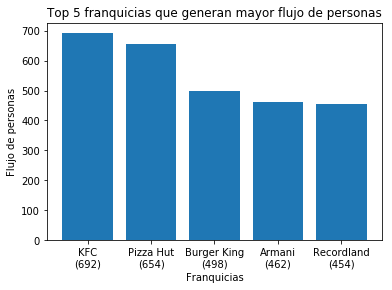

In [8]:
%matplotlib inline
cur.execute("SELECT * FROM top5localesflujopersonas;")

data = cur.fetchall()

label = ('Franquicia','Flujo de personas')
x = np.arange(len(data))
flujo = []
franquicias = []

for val in data:
    flujo.append(val[1])
    franquicias.append(val[0]+'\n('+str(val[1])+')')

fig, ax = plt.subplots()

plt.bar(x, flujo)
plt.xticks(x, franquicias)

ax.set_xlabel('Franquicias')
ax.set_ylabel('Flujo de personas')
ax.set_title('Top 5 franquicias que generan mayor flujo de personas')

plt.show()

Vista Extra 7: La persona que más veces ha estado en un local en el año, agrupado por local.

In [9]:
cur.execute("SELECT * FROM clientemasvisitasalocal;")
data = cur.fetchall()
labels = ('Local','Smartphone del cliente','Visitas')

df = pd.DataFrame(data, columns=labels)

df

,Local,Smartphone del cliente,Visitas
0,1,1,4
1,2,63,4
2,3,44,4
3,4,5,5
4,5,11,4
5,6,25,4
6,7,42,4
7,8,4,6
8,9,40,4
9,10,18,4


Vista Extra 8: Accesos al centro comercial agrupados por edad por cada puerta

In [10]:
cur.execute("SELECT * FROM accesosporedadpuerta;")
data = cur.fetchall()
labels = ('Cantidad de Personas','Grupo de Edad','Puerta')

df = pd.DataFrame(data, columns=labels)

df

,Cantidad de Personas,Grupo de Edad,Puerta
0,374,Adultos 30-60,Av. Galarraga
1,354,Adultos 30-60,Francisco de Miranda
2,322,Adultos 30-60,Av. Libertador
3,113,Jovenes 20-30,Francisco de Miranda
4,110,Jovenes 20-30,Av. Libertador
5,87,Jovenes 20-30,Av. Galarraga
6,58,Tercera Edad +60,Av. Libertador
7,57,Tercera Edad +60,Av. Galarraga
8,43,Tercera Edad +60,Francisco de Miranda
9,38,Adolescentes 13-19,Av. Libertador


Vista Extra 9: Cantidad de accesos al centro comercial agrupados por sexo y por día

In [11]:
cur.execute("SELECT * FROM accesosporsexopuerta;")
data = cur.fetchall()
labels = ('Cantidad de Personas','Grupo de Sexo','Puerta')

df = pd.DataFrame(data, columns=labels)

df

,Cantidad de Personas,Grupo de Sexo,Puerta
0,243,Mujeres,Francisco de Miranda
1,240,Mujeres,Av. Libertador
2,229,Hombres,Av. Galarraga
3,226,Mujeres,Av. Galarraga
4,220,Hombres,Francisco de Miranda
5,201,Hombres,Av. Libertador
6,113,No identificado,Av. Galarraga
7,104,No identificado,Francisco de Miranda
8,104,No identificado,Av. Libertador


Vista Extra 10: Cantidad de flujo de personas por sector y piso.

In [12]:
cur.execute("SELECT * FROM flujosectorpiso;")
data = cur.fetchall()
labels = ('Sector','Piso','Flujo de Personas')

df = pd.DataFrame(data, columns=labels)

df

,Sector,Piso,Flujo de Personas
0,Plaza Brasil,Autopista(1),2488
1,Plaza Colombia,Autopista(1),2548
2,Plaza Venezuela,Autopista(1),2570
3,Plaza Brasil,Feria(2),2542
4,Plaza Colombia,Feria(2),2578
5,Plaza Venezuela,Feria(2),1678


Vista Extra 11: Traer todas las primeras compras del día del último mes

In [13]:
cur.execute("SELECT * FROM primerasventasultimomes;")
data = cur.fetchall()
labels = ('No de Factura','Fecha','CI del Comprador','Monto')

df = pd.DataFrame(data, columns=labels)

df

,No de Factura,Fecha,CI del Comprador,Monto
0,1,2019-05-01 10:37:00,14,883
1,47,2019-05-02 11:40:00,78,267
2,100,2019-05-03 10:38:00,138,380
3,145,2019-05-04 10:32:00,201,71
4,208,2019-05-05 10:33:00,260,481
5,274,2019-05-06 10:33:00,317,978
6,324,2019-05-07 10:25:00,373,546
7,376,2019-05-08 10:33:00,430,466
8,422,2019-05-09 10:30:00,494,41
9,474,2019-05-10 10:35:00,545,234


Vista Extra 12: Ver la cantidad de salidas por puertas de emergencia

In [14]:
cur.execute("SELECT * FROM accesosporpuertaemergencia;")
data = cur.fetchall()
df = pd.DataFrame(data)

df

,0
0,572


Algunos procedimientos que requiren del input del usuario

Procedimiento Extra 1: Dado un smartphone verificar si se encuentra en el centro comercial

In [ ]:
try:
    user_input =int(input('Ingrese el id de un smartphone: '))
    parameter=str(user_input)
    
    query="SELECT * FROM verificaroneincc(%s);"
    cur.execute(query,(parameter,))
    
    print(cur.fetchone()[0])
except ValueError:
    print('INGRESA UN NÚMERO')

Procedimiento Extra 2: Traer información de ventas de una franquicia por local

In [ ]:
df = None

try:
    user_input =int(input('Ingrese el id de una franquicia: '))
    parameter=str(user_input)
    
    query="SELECT * FROM ventasdetienda(%s);"
    cur.execute(query,(parameter,))
    
    data=cur.fetchall()
    labels=('Franquicia','Local','Monto en Ventas')
    
    df = pd.DataFrame(data,columns=labels)
    
except ValueError:
    print('INGRESA UN NÚMERO')

df

Procedimiento Extra 3: Dado el id de un teléfono verificar su monto en ventas del último mes.

In [ ]:
try:
    user_input =int(input('Ingrese el id de un smartphone: '))
    parameter=str(user_input)
    
    query="SELECT * FROM gastosmartphone(%s);"
    cur.execute(query,(parameter,))
    
    data=cur.fetchone()[0]
    
    print(data,'Bs.')
    
except ValueError:
    print('INGRESA UN NÚMERO')

Procedimiento Extra 5: Dado el id de una mesa y un día en específico retornar la cantidad de veces que fue ocupada la mesa.

In [ ]:
try:
    user_input =int(input('Ingrese el id de una mesa: '))
    mesa=str(user_input)
    
    user_input =int(input('Ingrese un dia: '))
    while user_input <= 0 or user_input >= 31:
        user_input =int(input('Ingrese un dia válido: '))
    dia=str(user_input)
    
    user_input =int(input('Ingrese un mes: '))
    while user_input <= 0 or user_input >= 13:
        user_input =int(input('Ingrese un mes válido: '))
    mes=str(user_input)
    
    fecha=dia+'-'+mes+'-2019'
    print(mesa)
    print(fecha)
    
    query="SELECT * FROM cantidadocupacionesmesa(%s,%s);"
    cur.execute(query,(mesa,fecha,))
    
    data=cur.fetchone()[0]
    
    print(data, 'Ocupaciones')
    
except ValueError:
    print('INGRESA UN NÚMERO')

Procedimiento Extra 6: Dado el id de una puerta, retornar la cantidad de hombres y mujeres que han entrado en el presente mes

In [ ]:
df = None

try:
    user_input =int(input('Ingrese el id de un puerta: '))
    parameter=str(user_input)
    
    query="SELECT * FROM flujosexopuerta (%s);"
    cur.execute(query,(parameter,))
    
    data=cur.fetchall()
    labels=('Hombres','Mujeres','Puerta')
    df=pd.DataFrame(data, columns=labels)
    
except ValueError:
    print('INGRESA UN NÚMERO')

df

In [ ]:
df = None

try:
    user_input =int(input('Ingrese un mes: '))
    mes=str(user_input)
    while user_input <= 0 or user_input >= 13:
        user_input =int(input('Ingrese un mes válido: '))
    mes=str(user_input)
    
    query="SELECT * FROM primerafacturames (%s,2019);"
    cur.execute(query,(mes,))
    
    data=cur.fetchall()
    labels=('No','Fecha','CI Comprador','Monto')
    df=pd.DataFrame(data, columns=labels)
    
except ValueError:
    print('INGRESA UN NÚMERO')
    
df